In [8]:
import numpy as np
%pylab inline --no-import-all
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
## Neural nets
#.....................................
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import Conv2D, Flatten, MaxPooling2D, GaussianNoise
from keras.callbacks import History
from PIL import Image
from keras.metrics import TopKCategoricalAccuracy, SparseTopKCategoricalAccuracy
import np_utils
import cv2
import os
from PIL import Image
import cv2
import itertools
from numpy import asarray

Populating the interactive namespace from numpy and matplotlib


In [241]:
with np.load('training-dataset.npz')  as data:
    img = data['x']
    lbl = data['y']

In [162]:
# Dropping 1 position for prediction label

print((lbl[1]))

7


In [242]:
lbl_task_2 = []
for l in lbl:
    if l < 10 :
        l= str(l).zfill(2)
        lbl_task_2.append(l)
    else:
        lbl_task_2.append(l)
print(lbl_task_2)

lbl_task_2 = numpy.array(lbl_task_2, dtype=object) 



[23, '07', 16, 15, 23, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 21, 21, 24, 19, '05', '02', 25, '09', '05', 10, 21, 11, 24, 12, '01', 17, '09', '01', 24, 18, '01', '08', '04', '01', '09', '07', 21, '03', 16, '02', 20, 10, 12, 11, 20, '03', '06', 13, 15, 11, '04', 23, 12, 21, '01', 16, 14, 23, 10, '05', 12, '06', '02', '02', '01', '02', '01', '02', '08', 21, 13, 24, '05', '07', '07', 22, 24, '05', 20, 19, 12, '05', '03', '08', 26, 11, 26, '08', 16, 10, '08', 26, 12, 25, '09', '06', 25, 24, 26, '02', 19, '05', 23, 25, 17, 26, 11, 21, 19, 20, '04', 23, 17, '07', 26, '03', '05', 14, 15, 14, 16, 17, '06', '03', 23, 13, '03', 11, 25, 16, 17, 12, '09', 22, 12, 11, 15, 16, 13, '05', 21, '03', '03', 12, 21, 16, '09', 21, 20, 21, '03', 18, 23, 13, 20, '07', '07', 10, '03', '02', 13, 24, 12, '09', 21, 25, 23, 17, '02', '08', 21, 13, '02', 23, '06', 12, 17, '06', 14, '09', 14, 12, '04', 25, '09', 21, 24, '03', '09', '02', '06', 21, 25, '04', 26, '09', 20, 14, 25, 23, 19, 12, '04', 23, '04', 12, '02

In [243]:
print(type(lbl_task_2))

<class 'numpy.ndarray'>


In [147]:
#for i in range(len(lbl)):
    
i=1  
#min_num = np.array('10', dtype=np.uint8)
lbl[i] = lbl[i].astype(int)
#lbl[i] = str(lbl[i]).zfill(2)
print(type(lbl[i]))


#lbl[i] = np.array(lbl[i], dtype=np.uint8)
#print(type(min_num))
#print(type(lbl[i]))
#print(lbl[i]< 10 )

if  lbl[i] < 10 :
    print("inside if")
    lbl[i] = str(lbl[i]).zfill(2)
    lbl[i] = np.array(lbl[i], dtype=np.uint8)
    print(lbl[i])
else:
    print("inside else")
    lbl[i] = lbl[i]
    print(lbl[i])

<class 'numpy.uint8'>
inside if
7


In [107]:
print(lbl[20])

2


In [34]:
print(img.shape)

(124800, 784)


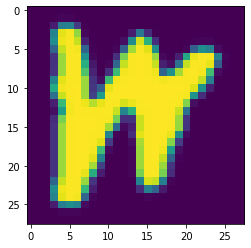

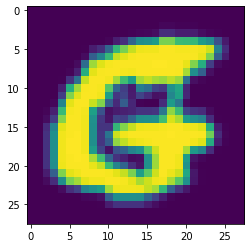

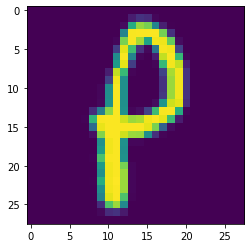

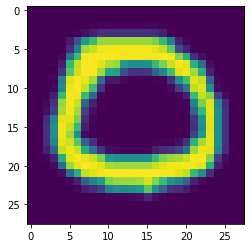

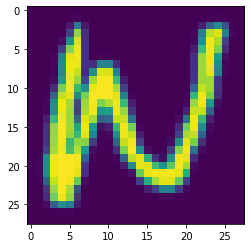

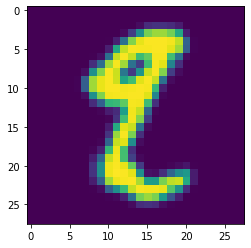

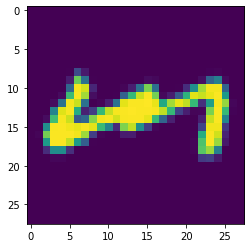

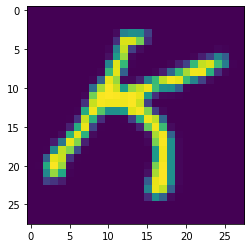

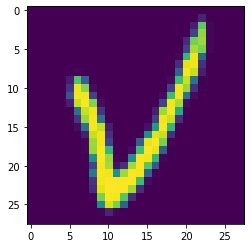

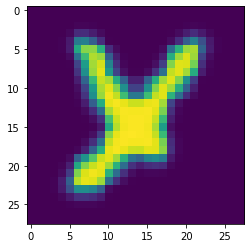

In [244]:
for im in range(10):
    image = img[im]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()

In [235]:
# Splitting data into train and test with 80% for training data and 10% for test data

X_train, X_val_test, y_train, y_val_test = train_test_split(img, lbl, test_size=0.2,random_state=1) 

# Splitting the train data again into validation and train data with 80% of the train data for training and the 
# remaining 10% for validation purpose

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.3, random_state=1) 


In [236]:
# Visualising the shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_test.shape)
print(y_val.shape)

(99840, 784)
(7488, 784)
(17472, 784)
(7488,)
(17472,)


In [ ]:
print(X_train.shape)

In [237]:
# Preprocessing the data so that it runs faster during fitting the model
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
y_val = y_val.astype("float32")

In [238]:
# One hot decoding 
onehot = LabelBinarizer()
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.fit_transform(y_val)
Y_test   = onehot.transform(y_test)

In [239]:
print(X_train.shape[0:])

(99840, 28, 28, 1)


In [ ]:
es = EarlyStopping(monitor= 'val_loss')
optimizer = Adam(lr=0.0001)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, and softmax activation

# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, batch_size = 450, epochs=100, validation_data = (X_val, Y_val), verbose=1, callbacks = [es])

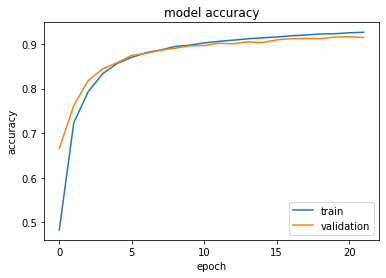

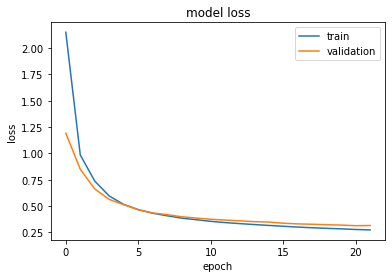

In [42]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [43]:
# Save the model to disk.
#model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predicting the classes on test set and printing the accuracy
y_pred = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred))

7488/7488 [==============================] - 3s 411us/step
0.005876068376068376


In [44]:
# Evaluating the model
model.evaluate(X_test,Y_test)

7488/7488 [==============================] - 1s 147us/step


[0.31104570767308914, 0.9126602411270142]

In [45]:
(X_test.shape)

(7488, 28, 28, 1)

In [46]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 350)               280350    
_________________________________________________________________
dense_2 (Dense)              (None, 26)               

In [47]:
print((y_pred[:10]))

[15 15  5 12 11  5  7 20 17  0]


In [48]:
print((y_test[:10]).astype('int32'))

[16 16  6 13 12  6  8 21 18  1]


In [49]:
# Task 2 
# Appeding leading zero to label
# Making the model Robust against noises in the image

In [248]:
# Splitting data into train and test with 80% for training data and 10% for test data

X_train, X_val_test, y_train, y_val_test = train_test_split(img, lbl_task_2, test_size=0.2,random_state=1) 

# Splitting the train data again into validation and train data with 80% of the train data for training and the 
# remaining 10% for validation purpose

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.3, random_state=1) 


In [249]:
# Preprocessing the data so that it runs faster during fitting the model
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
y_val = y_val.astype("float32")

In [250]:
# One hot decoding 
onehot = LabelBinarizer()
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.fit_transform(y_val)
Y_test   = onehot.transform(y_test)

In [251]:
# compiling and fitting the sequential model
#.....................................
es = EarlyStopping(monitor= 'val_loss')
optimizer = Adam(lr=0.0001)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',strides=(1, 1),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GaussianNoise(0.5))
model.add(Flatten())
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, and softmax activation

# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics = ['top_k_categorical_accuracy'])
history1 = model.fit(X_train, Y_train, epochs=100, batch_size = 450, validation_data = (X_val, Y_val), verbose=1, callbacks = [es])

Train on 99840 samples, validate on 17472 samples
Epoch 1/100
99840/99840 [==============================] - 65s 656us/step - loss: 2.7675 - top_k_categorical_accuracy: 0.5127 - val_loss: 1.3427 - val_top_k_categorical_accuracy: 0.9254
Epoch 2/100
99840/99840 [==============================] - 61s 611us/step - loss: 1.0959 - top_k_categorical_accuracy: 0.9493 - val_loss: 0.8452 - val_top_k_categorical_accuracy: 0.9687
Epoch 3/100
99840/99840 [==============================] - 59s 594us/step - loss: 0.7757 - top_k_categorical_accuracy: 0.9760 - val_loss: 0.6734 - val_top_k_categorical_accuracy: 0.9805
Epoch 4/100
99840/99840 [==============================] - 65s 646us/step - loss: 0.6429 - top_k_categorical_accuracy: 0.9840 - val_loss: 0.5815 - val_top_k_categorical_accuracy: 0.9864
Epoch 5/100
99840/99840 [==============================] - 68s 676us/step - loss: 0.5680 - top_k_categorical_accuracy: 0.9881 - val_loss: 0.5313 - val_top_k_categorical_accuracy: 0.9890
Epoch 6/100
99840/99

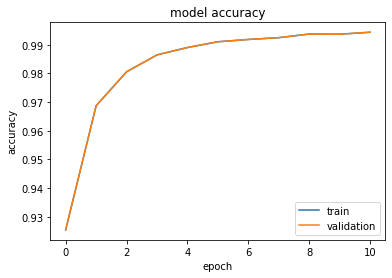

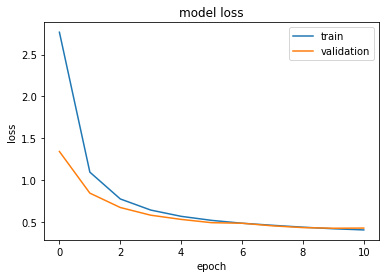

In [252]:
#summarize history for accuracy
plt.plot(history1.history['val_top_k_categorical_accuracy'])
plt.plot(history1.history['val_top_k_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [253]:
y_pred1 = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred1))
print(y_test.shape)

7488/7488 [==============================] - 2s 280us/step
0.004807692307692308
(7488,)


In [254]:
top_values_index = sorted(range(len(y_pred1)), key=lambda i: y_pred1[i])[-5:]
print(top_values_index)

[7330, 7360, 7368, 7405, 7443]


In [288]:
img_data = np.load('test-dataset.npy')

In [ ]:
#make new folder
import os
cwd = os.getcwd()
print(cwd)
new_folder = "test_dataset_images"
folder = os.path.join(cwd, new_folder)
os.makedirs(folder)

In [284]:
print(folder)

C:\Users\Goutham Indiran\Machine Learning\Challenge\test_dataset_images


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


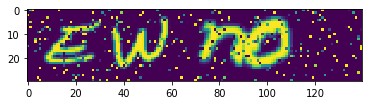

In [541]:
#converting array to images and saving it in current work directory
for i in range(25):
    print(i)
    plt.imshow(img_data[i])
    data = Image.fromarray(img_data[i])
    if data.mode != 'RGB':
        data = data.convert('RGB')
    data.save(str(folder)+'\\test_image_'+str(i)+'.png') 


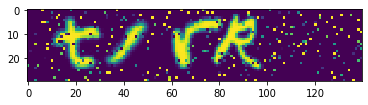

In [256]:
imt=img_data[1]
plt.imshow(imt)
plt.show()

In [257]:
def split_image(get_value):
    pass


7 11 18 16
80 6 22 17
42 3 30 22
15 2 5 8
[7, 18, 11, 16, 80, 22, 6, 17, 42, 30, 3, 22]


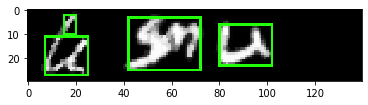

In [519]:
# coord_list=[]
# # Convert to float: Important for subtraction later which won't work with uint8
# #for im in img_data


# #sample_image = cv2.imread('sample_8.png')

# folder="test_dataset_images"

# for filename in os.listdir(folder):
#         sample_image = cv2.imread(os.path.join(folder,filename))
#         #prediction_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
#         if sample_image is not None:
#             median_blr = cv2.medianBlur(sample_image, 3)
#             plt.imshow(median_blr)
#             median_blr.shape
#             cv2.waitKey(0)
#             copy = median_blr.copy()
#             gray = cv2.cvtColor(median_blr, cv2.COLOR_BGR2GRAY)
#             prediction_image = gray
#             thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
#             ROI_number = 0
#             cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#             cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#             for c in cnts:
#                 x,y,w,h = cv2.boundingRect(c)
#                 ROI = img[y:y+h, x:x+w]
#                 print(x,y,w,h)
#                 if w > 9  or h > 10 :
#                     coord_list.append(x)
#                     coord_list.append(w)
#                     coord_list.append(y)
#                     coord_list.append(h)

#                # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
#                 cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),1)
#                 ROI_number += 1

#             plt.imshow(copy)
#             cv2.waitKey()

#             print(coord_list)


In [549]:
def split_image(coord_list):
    new_coord=[]
    updated_coord=[]
    final_coord=[]
    for i in range(len(coord_list)):
            args = [iter(coord_list)] * 4
            new_coord = list(itertools.zip_longest(*args, fillvalue=None))
    return sorted(new_coord)
split_image(coord_list)

[(7, 18, 11, 16),
 (11, 19, 4, 21),
 (12, 42, 3, 22),
 (15, 14, 3, 22),
 (34, 15, 6, 17),
 (37, 16, 3, 23),
 (42, 30, 3, 22),
 (54, 14, 5, 19),
 (61, 21, 4, 21),
 (64, 12, 4, 22),
 (78, 19, 3, 22),
 (80, 22, 6, 17),
 (95, 20, 3, 22),
 (101, 21, 8, 13)]

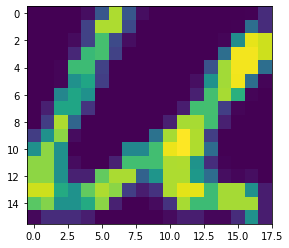

1/1 [==============================] - 0s 42ms/step
[20]
*********Two Images**********


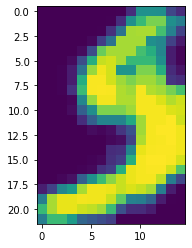

2/2 [==============================] - 0s 1ms/step
[20  6]
*********Two Images**********


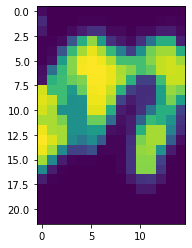

3/3 [==============================] - 0s 14ms/step
[20  6 12]


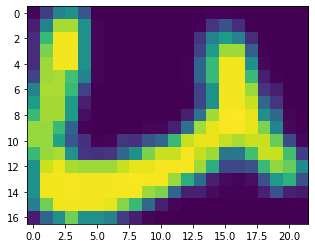

4/4 [==============================] - 0s 2ms/step
[20  6 12 22]


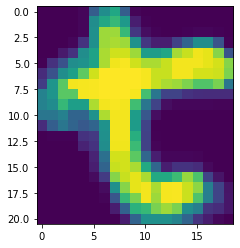

1/1 [==============================] - 0s 96ms/step
[16]


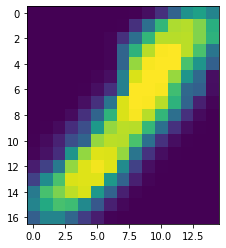

2/2 [==============================] - 0s 18ms/step
[16 16]


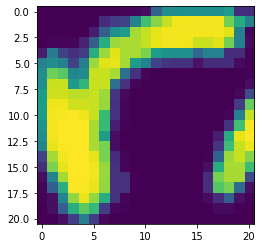

3/3 [==============================] - 0s 9ms/step
[16 16 17]


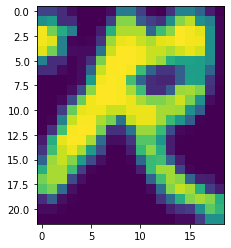

4/4 [==============================] - 0s 12ms/step
[16 16 17 17]


In [604]:
folder="test_dataset_images"
for filename in os.listdir(folder):
    coord_list=[]
    new_image_list=[]
    image_pred=[]
    sample_image = cv2.imread(os.path.join(folder,filename))
        #prediction_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
    if sample_image is not None:
        median_blr = cv2.medianBlur(sample_image, 3)
        plt.imshow(median_blr)
        median_blr.shape
       # cv2.waitKey(0)
        copy = median_blr.copy()
        gray = cv2.cvtColor(median_blr, cv2.COLOR_BGR2GRAY)
        prediction_image = gray
        thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
        ROI_number = 0
        cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        for c in cnts:
            x,y,w,h = cv2.boundingRect(c)
            ROI = img[y:y+h, x:x+w]
            #print(x,y,w,h)
            if w > 9  or h > 10 :
                coord_list.append(x)
                coord_list.append(w)
                coord_list.append(y)
                coord_list.append(h)
            cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),1)
            ROI_number += 1
        plt.imshow(copy)
       # cv2.waitKey()
        #print(coord_list)
    imk=prediction_image
    coords= split_image(coord_list)
    for i in range(len(coords)):
        if coords[i][1] >= 30 :
            new_w = coords[i][1] //2
            x_temp = 0
            for j in range(2):
                print("*********Two Images**********")
                w = new_w
                imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0] + x_temp: coords[i][0] + x_temp + new_w]
                plt.imshow(imtest1)
                plt.show()
                res1 = cv2.resize(imtest1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
                new_image_list.append(np.asarray(res1))
                image_pred=np.array(new_image_list)
                image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
                preds1=model.predict_classes(image_pred, verbose=1)
                print(preds1[:len(coords)+1])
                del coord_list[:]
                np.delete(image_pred,0,0)
                x_temp = new_w
        else:
            #find perfect coordinates?
           # print("second if")
            #print(coords[i])
            imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0]:coords[i][0]+coords[i][1]]
            plt.imshow(imtest1)
            plt.show()
            res1 = cv2.resize(imtest1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
            new_image_list.append(np.asarray(res1))
           # print("Inside for Image pred",np.array(image_pred).shape)
            image_pred=np.array(new_image_list)
            image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
           # print("shape",(image_pred.shape) )
            preds1=model.predict_classes(image_pred, verbose=1)
            print(preds1[:len(coords)+1])
            #print(image_pred.shape)
            del coord_list[:]
            np.delete(image_pred,0,0)

In [485]:
# def split_image(coord_list):
#     new_coord=[]
#     updated_coord=[]
#     final_coord=[]
#     for i in range(len(coord_list)):
#             args = [iter(coord_list)] * 4
#             new_coord = list(itertools.zip_longest(*args, fillvalue=None))
#     return sorted(new_coord)
    
# split_image(coord_list)

[(7, 22, 4, 20),
 (13, 8, 3, 22),
 (14, 12, 2, 24),
 (15, 14, 3, 22),
 (27, 49, 6, 17),
 (36, 22, 3, 23),
 (37, 16, 3, 23),
 (37, 38, 3, 22),
 (54, 14, 5, 19),
 (63, 22, 3, 22),
 (88, 10, 3, 22),
 (92, 23, 3, 23),
 (94, 20, 3, 22),
 (95, 20, 3, 22)]

second if
(7, 22, 4, 20)


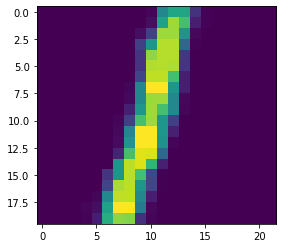

second if
(36, 22, 3, 23)


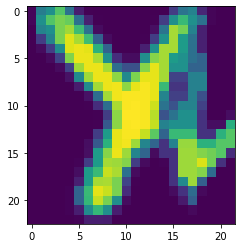

second if
(61, 21, 4, 21)


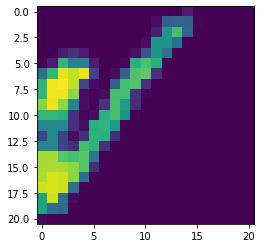

second if
(63, 22, 3, 22)


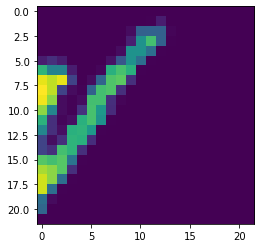

second if
(80, 22, 6, 17)


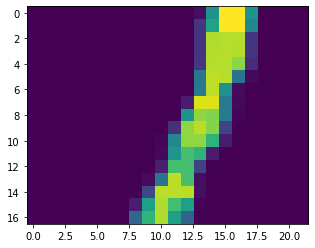

(5, 28, 28)


In [513]:
#for i in imag_data:
#def predict_label
imk=prediction_image
coords= split_image(coord_list)
#print(len(coords))
image_pred=[]
pred_store=[]
for i in range(len(coords)):
    #print(coords[i][1])
    #img[ y:y+h, x:x+w,]
#     if coords[i][1] > 40:
#         print(coords[i])
#         print("First if")
#         new_w = coords[i][1] //2
#         imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0]:coords[i][0]+new_w]
#         plt.imshow(imtest1)
#         plt.show()
    if coords[i][1] >= 20 and coords[i][1] < 23 and coords[i][0] <= 94:
        print("second if")
        print(coords[i])
        imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0]:coords[i][0]+coords[i][1]]
        plt.imshow(imtest1)
        plt.show()
        res1 = cv2.resize(imtest1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
        res1 = np.asarray(res1)
    #print(res1.shape)
        #res1 = res1.reshape(res1.shape[0], 28, 28, 1).astype("float32") / 255
        
        #pred_img1 = np.expand_dims(res1, axis=0)
        image_pred.append(np.asarray(res1))
        
image_pred=np.array(image_pred)
print(image_pred.shape)

In [487]:
print(image_pred)

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   5   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...  17   7   0]
  [  0   0   0 ...  89  40   0]
  [  0   0   0 ... 182 114  56]
  ...
  [  0   0   0 ... 228 170  96]
  [  0   0   0 ... 144  92  36]
  [  0   0   0 ...  82  34  14]]]


In [514]:
image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
print("shape",(image_pred.shape) )
preds1=model.predict_classes(image_pred, verbose=1)
print(preds1[:5])

shape (5, 28, 28, 1)
5/5 [==============================] - 0s 2ms/step
[ 9 23 17 17  8]


In [ ]:
print(accuracy_score(y_test, image_pred))

# referrence code


(30, 140)
7 11 18 16
80 6 22 17
42 3 30 22
15 2 5 8


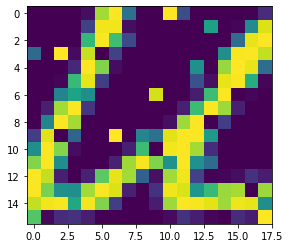

Res shape (28, 28)
Inside for Image pred (1, 28, 28)


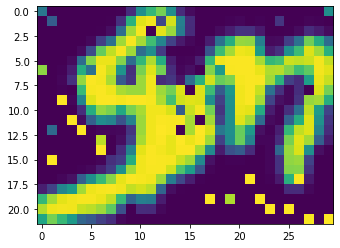

Res shape (28, 28)
Inside for Image pred (2, 28, 28)


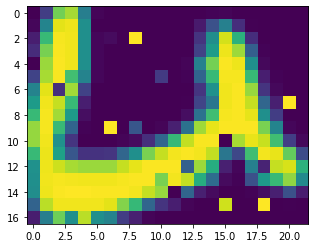

Res shape (28, 28)
Inside for Image pred (3, 28, 28)
Image_pred before reshape (3, 28, 28)
[0] 3
Image_pred after shape (3, 28, 28, 1)
3/3 [==============================] - 0s 21ms/step
[20  1 22]


In [535]:
sample_image = cv2.imread('test_dataset_images/test_image_0.png')
plt.imshow(sample_image)

prediction_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
prediction_image.shape

median_blr = cv2.medianBlur(sample_image, 3)
plt.imshow(median_blr)
median_blr.shape

copy = median_blr.copy()
gray = cv2.cvtColor(median_blr, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
gray.shape

thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
print(thresh.shape)
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
plt.imshow(thresh)

coord_list = []
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = sample_image[y:y+h]
    print(x,y,w,h)
    if w > 9  or h > 10 :
        coord_list.append(x)
        coord_list.append(w)
        coord_list.append(y)
        coord_list.append(h)
    
   # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),1)
    ROI_number += 1

plt.imshow(copy)
#print(coord_list)

def split_image(coord_list):
    new_coord=[]
    updated_coord=[]
    final_coord=[]
    for i in range(len(coord_list)):
            args = [iter(coord_list)] * 4
            new_coord = list(itertools.zip_longest(*args, fillvalue=None))
   # print(new_coord)
    return(sorted(new_coord))

split_image(coord_list)


#for i in imag_data:
imk=prediction_image
coords= split_image(coord_list)
image_pred=[]
pred_store=[]
for i in range(len(coords)):
    #img[x:x+w, y:y+h]
    imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0]:coords[i][0]+coords[i][1]]
    plt.imshow(imtest1)
    plt.show()
    res1 = cv2.resize(imtest1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    res1.shape
    print("Res shape",res1.shape)
    #pred_img1 = np.expand_dims(res1, axis=0)
    image_pred.append(np.asarray(res1))
    print("Inside for Image pred",np.array(image_pred).shape)
image_pred=np.array(image_pred)
print("Image_pred before reshape",(image_pred.shape) )
print("[0]", image_pred.shape[0])
image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
print("Image_pred after shape",(image_pred.shape) )
preds1=model.predict_classes(image_pred, verbose=1)
print(preds1[:5])